7.1.2025 \
Gruppe: Marlene, Luca, Yassin

# Verhalten dehnbarer Stoffe

## Inhaltsverzeichnis:
* Versuchsdurchführung Teil 1
* Versuchsdurchführung Teil 2

### Ziel:
Unser Ziel ist es das Verhalten dehnbarer Stoffe zu untersuchen und uns mit selbst entwickelten Experimenten zu beschäftigen.

## Versuchsdurchführung Teil 1

### Einleitung:
In unserem ersten Versuch wollen wir testen, ob das Hooksche Modell das Verhalten einiger zufällig ausgewählten dehnbaren Stoffen gut beschreibt.

**Material:** \
- Haargummi \
- verschiedene Gewichte von 25g bis 200g

**Durchführung:** \
Messung der Auslenkung verschiedener Gewichte an einem Haargummi zur Bestimmung der Federkonstante.\
\
**Messgerät:** \
Das Lineal von Westcott. Es hat eine Ableseskala von 1mm und eine unbekannte Geräteunsicherheit, welche vermutlich vernachlässigbar ist.
Die Messunsicherheit beträgt somit:\
$$
u_x = \frac{u_{\text{Skala}}}{2*\sqrt{6}} = \frac{1 \, \text{mm}}{2*\sqrt{6}} \approx 0,20 \, \text{mm}
$$
\
**Versuchsaufbau:** \
\
**Messung:** \

| Masse (g) | Messwert (mm) |
|-----------|---------------|
| 0         | 56            |
| 25        | 75            |
| 50        | 80            |
| 100       | 91            |
| 150       | 117           |
| 200       | 142           |
| 250       | 158           |
| 300       | 165           |
| 350       | 171           |
| 400       | 173           |

**Überlegungen:** \
Beim Ablesen ist uns aufgefallen, dass es teilweise schwer war herauszufinden wie weit unten die Gewichte sind, da sie nicht direkt neben dem Lineal standen und dadurch sich Ableseparallaxe gebildet haben. \

Außerdem haben wir festgestellt, dass die Gewichte möglicherweise durch Abnutzung, falsche Normung nicht korrekt sind und haben deswegen nochmal nachgemessen.

**Messgerät:** \
Die Waage EK-6000H von A&D Instruments .Es hat eine Ableseskala von 0,1g und eine Geräteunsicherheit von 0,1g. Die Messunsicherhiet der Waage beträgt somit:\
$$
u_m = \sqrt{(\frac{u_{\text{Skala}}}{2*\sqrt{3}})^2 + (u_{\text{Gerät}})^2} = \sqrt{\left(\frac{0,1}{2\sqrt{3}}\right)^2 + (0,1)^2} ≈ 0,10g
$$
\
**Messung:** \

| Masse (g) | Messwert (mm) |
|-----------|---------------|
| 0         | 56            |
| 24,8      | 75            |
| 50,1      | 80            |
| 99,8      | 91            |
| 149,9     | 117           |
| 199,0     | 142           |
| 249,1     | 158           |
| 298,8     | 165           |
| 348,9     | 171           |
| 398       | 173           |

**Auswertung:** \


$$
F = m \cdot g
$$

wobei \( g = 9,81 \, $\mathrm{m/s^2}$ \) die Erdbeschleunigung ist. Die Differenz der Auslenkungen wird berechnet als:

$$
\Delta x = x - x_0
$$

| Gewichtskraft \( F \) (N) | Differenz \( $\Delta x$ \) (mm)|
|---------------------------|------------------------------|
| 0.24                      | 19                           |
| 0.49                      | 24                           |
| 0.98                      | 35                           |
| 1.47                      | 61                           |
| 1.95                      | 86                           |
| 2.44                      | 102                          |
| 2.93                      | 109                          |
| 3.42                      | 115                          |
| 3.91                      | 117                          |

Die Unsicherheiten von davor bleiben erhalten. \
$ u_F = g*u_m = 0,000981 N $ \
$ u_\text{Δx} = u_x + u_x = 0,40mm $

In [ ]:
# benötigte Module
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

# Daten als Arrays
F = np.array([0.00, 0.24, 0.49, 0.98, 1.47, 1.95, 2.44, 2.93, 3.42, 3.91])  # Gewichtskraft in N
delta_x = np.array([0, 19, 24, 35, 61, 86, 102, 109, 115, 117])  # Differenz in mm

#Unsicherheiten
u_m = 0.1 / 1000     # 0.1 g in kg
u_x = 0.2 / 1000     # 0.2 mm in m
u_F = g = 9.81 * u_m # Unsicherheit der Gewichtskraft in N
u_d = u_m + u_m      # Unsicherheit der Diffenrenz in m

# Umwandlung in einen Panda DataFrame
feder = pd.DataFrame({
      'Differenz (mm)': delta_x,
      'Gewichtskraft (N)': F,
      'Unsicherheiten Gewichtskraft (N)': u_F,
      'Unsicherheiten Differenz (mm)': u_d})
df_feder = pd.DataFrame(data=feder)  # erzeugt ein Panda DataFrame

# Struktur des DataFrames
df_feder.head()

,Differenz (mm),Gewichtskraft (N),Unsicherheiten Gewichtskraft (N),Unsicherheiten Differenz (mm)
0,0,0.00,0.000981,0.0002
1,19,0.24,0.000981,0.0002
2,24,0.49,0.000981,0.0002
3,35,0.98,0.000981,0.0002
4,61,1.47,0.000981,0.0002


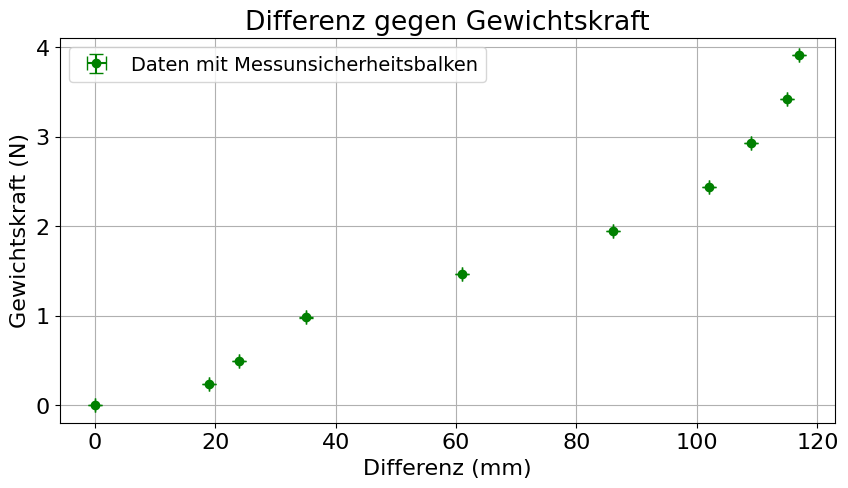

In [ ]:
# Parameter aus dem DataFrame
x2 = df_feder['Differenz (mm)']
y2 = df_feder['Gewichtskraft (N)']
xerr = df_feder['Unsicherheiten Differenz (mm)']
yerr = df_feder['Unsicherheiten Gewichtskraft (N)']

# Diagramm, welches die Daten mit Fehlerbalken anzeigt
plt.errorbar(x2, y2, xerr=xerr, yerr=yerr, fmt='go', label='Daten mit Messunsicherheitsbalken', capsize=5)

# Plot-Einstellungen
plt.grid(True)
plt.legend(loc="upper left")  # Ort der Legende
plt.xlabel('Differenz (mm)')
plt.ylabel('Gewichtskraft (N)')
plt.title("Differenz gegen Gewichtskraft")
plt.show()

**Fazit:**
Das Hooksche Gesetz sagt uns, dass ein dehnbarer Stoff einen linearen Zusammenhang hat zwischen der Gewichtskraft welche auf ihn wirkt und der damit resultierenden Auslenkung. Unsere Messdaten vom Haargummi unterstützen dies nicht perfekt, aber zeigen dennoch eine näherbar lineare Abhängigkeit. Wir vermuten das es möglicherweise mehrere Bereiche mit lineare Abhängigkeiten gibt, woraus auch folgt, dass das Haargummi unterschiedliche Federkonstanten unter verschiedene Gewichtsauslastungen hat.

## Versuchsdurchführung Teil 2

### Einleitung:

Für den 2. Teil unseres Versuches haben wir uns selbständig eine Forschungsfrage überlegt, die wir anschließend überprüfen. \
Wir wollen herausfinden ob wir das Haargummi aus Teil 1 so stark verformen können, sodass sich die "Federkonstante" des Haargummi dauerhaft verändert. Es sich also plastisch verformt ohne zu reißen.

### Durchführung:
Dafür verwenden wir den Versuchsaufbau aus Teil 1. \
Wir messen die Auslenkung des Haargummis mit einem Gewicht von 150g als Referenz, vor der Belastung mit hohem Gewicht. \
Danach belasten wir das Haargummi mit einem sehr großen Gewicht und testen danach wieder die Auslenkung mit unserem Referenzgewicht 150g. \
Sollte sich die Auslenkung noch nicht verändert haben, führen wir den Versuch nochmal mit noch größerem Gewicht durch.

### Messwerte:

1. Mal Belastung mit 150g: Auslenkung um 117mm \
Belastung mit 800g
2. Mal Belastung mit 150g: Auslenkung um 120mm

###### Bemerkung:

Nachdem das Haargummi mit 800g belastet wurde, hat sich die Auslenkung mit 150g Belastung mit der Zeit langsam vergrößert. \
Woraus folgt, dass die 2. Messung direkt noch dem Belasten mit 150g stattfinden muss.

### Auswertung:

Wir haben einen Unterschied von 3mm gemessen, was im Vergleich zu unserer Messunsicherheit von 0,20mm signifikant ist. Somit können wir aus unseren Messungen schließen, dass eine Belastung mit 800g die "Federkonstante" des Haargummis langfristig verändert hat. \
Daraus lässt sich vermuten, dass sich das Haargummi dauerhaft plastisch verformt hat. Die Elastizität des Haargummis ist dauerhaft verändert und geht nicht mehr in den Ursprungszustand zurück.
